# Modèle SIR

Le modèle SIR est un modèle mathématique utilisé pour décrire la propagation d'une maladie infectieuse dans une population. Il divise la population en trois catégories : les susceptibles (S), les infectés (I) et les guéris (R). Les équations différentielles du modèle SIR sont les suivantes :
$$
\begin{cases}
\frac{dS}{dt} = -\beta {S I} \\
\frac{dI}{dt} = \beta {S I} - \gamma I \\
\frac{dR}{dt} = \gamma I
\end{cases}
$$
Et si $s$, $i$ et $r$ représentent les proportions de la population dans chaque catégorie, alors les équations deviennent :
$$
\begin{cases}
\frac{ds}{dt} = -\beta {s i} \\
\frac{di}{dt} = \beta {s i} - \gamma i \\
\frac{dr}{dt} = \gamma i
\end{cases}
$$
Résolvons d'abord ces équations. 

## Méthode de Runge-Kutta d'ordre 4 :

Soit le problème de Cauchy suivant :

$$\frac{dy}{dt} = f(t,y)$$

avec la condition initiale $y(t_0) = y_0$}. On cherche à approcher la solution en $t_{n+1}=t_n + h$. Pour ce faire, nous posons :

$y_{n+1} = y_n + \frac{h}{6}(k_0 + 2k_1 + 2k_2 + k3)$

avec

$k_0 = f(t_n, y_n) \newline
k_1 = f(t_n + \frac{h}{2}, y_n + \frac{hk_1}{2}) \newline
k_2 = f(t_n + \frac{h}{2}, y_n + \frac{hk_2}{2}) \newline
k_3 = f(t_n + h, y_n + hk_3)$

In [2]:
def rk4(f, t0, y0, h, beta, gamma, mu, nu):
    '''
    Méthode Runge-Kutta d'ordre 4
    '''
    k0 = f(y0[:], beta, gamma, mu, nu, t0)
    k1 = f(y0[:] + h/2 * k0, beta, gamma, mu, nu, t0 + h/2)
    k2 = f(y0[:] + h/2 * k1, beta, gamma, mu, nu, t0 + h/2)
    k3 = f(y0[:] + h * k2, beta, gamma, mu, nu, t0 + h)

    k = 1/6 * (k0 + 2*k1 + 2*k2 + k3)
    return t0 + h, y0 + h * k

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Valeurs initiales
N_temps = 10000 #Nombre de 30s dans 100h
h = 1
I0 = 10
S0 = 990
R0 = 0
M0 = 0

# Normalisation de la population (stabilité du RK4)
Norme_pop = I0 + S0 + R0
i0 = I0 / Norme_pop
s0 = S0 / Norme_pop
r0 = R0 / Norme_pop

# Définition des tableaux
t = np.zeros(N_temps+1)
zombies = np.empty((3, N_temps+1))

# Conditions initiales
zombies_ini = np.array([s0, i0, r0])
t0 = 0

# Application des conditions initiales
zombies[:,0] = zombies_ini
t[0] = t0

beta = 0.5 #Taux d'infection
gamma = 0.1 #Taux de récupération
mu = 0.1 #Taux de resusceptibilité
nu = 0.05 #Taux de mortalité

In [4]:
def derivee(zombies, beta, gamma, mu, nu, t):
    '''
        Soit zombies = (S, I, R)
        Loi 1 : d[zombies[0]]/dt = -beta * zombies[0] * zombies[1] 
        Loi 2 : d[zombies[1]]/dt = beta * zombies[0] * zombies[1] - gamma * zombies[1]
        Loi 3 : d[zombies[2]]/dt = gamma * zombies[1] 
    '''
    # Initialisation de la dérivée
    dzombies = np.empty(zombies.shape)
    
    # Dérivée
    dzombies[0] = -beta * zombies[0] * zombies[1]
    dzombies[1] = beta * zombies[0] * zombies[1] - gamma * zombies[1]
    dzombies[2] = gamma * zombies[1] 

    return dzombies

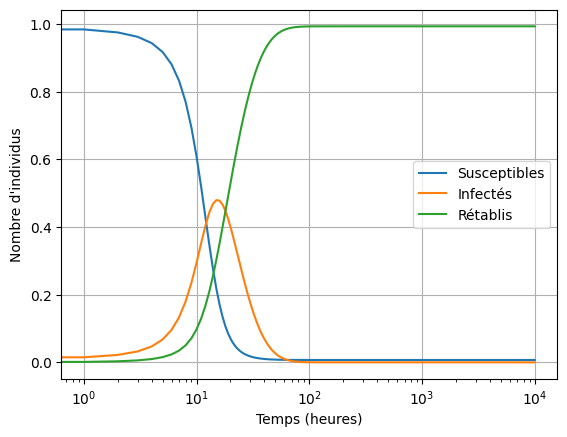

In [5]:
# Propagation via RK4
for i in range(N_temps):
    t[i+1], zombies[:, i+1] = rk4(derivee, t[i], zombies[:, i], h, beta, gamma, mu, nu)

# Représentation de la solution
plt.semilogx(t, zombies[0,:], label="Susceptibles")
plt.semilogx(t, zombies[1,:], label="Infectés")
plt.semilogx(t, zombies[2,:], label="Rétablis")
plt.xlabel('Temps (heures)')
plt.ylabel("Nombre d'individus")
plt.legend()
plt.grid()
plt.show()

## Paramètre $\mathcal{R_0}$
Le paramètre $\mathcal{R_0}$ est le nombre moyen de cas secondaires produits par un individu infectieux au cours de sa période d’infection.
Démontrons son expression.

Si l'infection se propage, alors le nombre d'infectés doit croître au début de l'épidémie, c'est-à-dire que $\frac{di}{dt} > 0$. En utilisant la deuxième équation du modèle SIR, nous avons :
$$\frac{di}{dt} = \beta s i - \gamma i > 0$$
En divisant par $i$ (en supposant que $i > 0$), nous obtenons :
$$\beta s - \gamma > 0$$
$$\beta s > \gamma$$
$$\frac{\beta s}{\gamma} > 1$$

On nomme $\mathcal{R}$ le terme $\frac{\beta s}{\gamma}$. Donc $\mathcal{R} > 1$ est la condition nécessaire pour que l'infection se propage.

Et donc on définit $$\boxed{\mathcal{R_0} = \frac{\beta s_0}{\gamma}}$$
Il faut noter que $s_0$ est la proportion de la population qui est susceptible au début de l'épidémie, et non l'effectif. Cela veut dire qu'il faut diviser le nombre de susceptibles $S_0$ par la taille totale de la population $N$ pour obtenir $s_0$. Au final, l'expression de $R_0$ est :$$\boxed{\mathcal{R_0} = \frac{\beta S_0}{\gamma N}}$$

Pour $\beta = 0.5$ , $\gamma = 0.1$ , $S_0 = 990$ , $I_0 = 10$ et $R_0 = 0$, nous avons :$$\mathcal{R_0} = \frac{0.5 \times 990}{0.1 \times 1000} = 4.95$$ Cela signifie que chaque individu infectieux peut potentiellement infecter 5 autres personnes au début de l'épidémie, ce qui indique une forte propagation de la maladie.

## Paramètre $I_{max}$
Dans le modèle SIR, le nombre d'infectés atteint un maximum à un certain temps $t_{max}$. Pour trouver ce maximum, on a besoin de trouver le point où la dérivée de $i$ par rapport au temps est nulle, c'est-à-dire :
$$\frac{di}{dt} = 0$$
En utilisant l'équation du modèle SIR pour $i$, on a :
$$\frac{di}{dt} = \beta s i - \gamma i = i(\beta s - \gamma)$$
Pour que $\frac{di}{dt} = 0$, il faut que $i = 0$ ou que $\beta s - \gamma = 0$. Le cas $i = 0$ correspond à l'extinction de l'infection, tandis que le cas $\beta s - \gamma = 0$ correspond au maximum de $i$. En résolvant $\beta s - \gamma = 0$, on trouve :
$$s = \frac{\gamma}{\beta} = \frac{s_0}{\mathcal{R_0}} = \frac{S_0}{\mathcal{R_0} N}$$
Ce qui correspond à la proportion de susceptibles lorsque le nombre d'infectés est à son maximum. On peut ainsi le vérifier dans la solution numérique obtenue à partir du RK4.
Pour notre exemple, avec $S_0 = 990$, $\mathcal{R_0} = 4.95$ et $N = 1000$, nous avons :
$$S = \frac{990}{4.95 \times 1000} = 0.2$$
On le véirifie bien sur la courbe obtenue à partir du RK4.

## Paramètre $S_{\infty}$
Le paramètre $S_{\infty}$ représente le nombre de susceptibles à la fin de l'épidémie, c'est-à-dire lorsque le nombre d'infectés est nul.
On a $I = 0$ à la fin de l'épidémie, donc $N = S_{\infty} + R_{\infty}$, où $N$ est la population totale. En proportion, cela s'écrit $1 = s_{\infty} + r_{\infty}$. En utilisant la première équation du modèle SIR, on a :
$$\frac{ds}{dt} = -\beta s i$$
En intégrant cette équation de $t=0$ à $t=\infty$, on obtient :
$$\int_{s_0}^{s_{\infty}} \frac{ds}{s} = -\beta \int_{0}^{\infty} i dt$$
$$\ln\left(\frac{s_{\infty}}{s_0}\right) = -\beta \int_{0}^{\infty} i dt$$
En utilisant la troisième équation du modèle SIR qu'on substitue dans l'intégrale, on a :
$$\ln\left(\frac{s_{\infty}}{s_0}\right) = -\beta \int_{0}^{\infty} \frac{dr}{\gamma}$$
$$\ln\left(\frac{s_{\infty}}{s_0}\right) = -\frac{\beta}{\gamma} (r_{\infty} - r_0)$$
On suppose que $r_0 = 0$, donc :
$$\ln\left(\frac{s_{\infty}}{s_0}\right) = -\frac{\beta}{\gamma} r_{\infty}$$
En utilisant le fait que $r_{\infty} = 1 - s_{\infty}$, on obtient :
$$\ln\left(\frac{s_{\infty}}{s_0}\right) = -\frac{\beta}{\gamma} (1 - s_{\infty})$$
En exponentiant les deux côtés, on trouve :
$$\frac{s_{\infty}}{s_0} = e^{-\frac{\beta}{\gamma} (1 - s_{\infty})}$$
Ou encore avec l'expression de $\mathcal{R_0}$ : $$s_{\infty} = s_0 e^{-\frac{\mathcal{R_0}}{s_0} (1 - s_{\infty})}$$

Pour trouver $s_{\infty}$, on peut utiliser la méthode de la dichotomie.

In [11]:
s0 = 0.99
R0 = 4.95

s = s0
tol = 1e-6

while True:
    s_new = s0 * np.exp(-R0 * (1 - s) / s0)
    if abs(s_new - s) < tol:
        break
    s = s_new

print("s_inf =", s_new)


s_inf = 0.0069049146724081585


# Modèle SIRS
Le modèle SIRS est une extension du modèle SIR qui prend en compte la possibilité que les individus rétablis puissent redevenir susceptibles après un certain temps. Les équations du modèle SIRS sont les suivantes :
$$\frac{dS}{dt} = -\beta S I + \mu R$$
$$\frac{dI}{dt} = \beta S I - \gamma I$$
$$\frac{dR}{dt} = \gamma I - \mu R$$
où $S$ est le nombre de susceptibles, $I$ est le nombre d'infectés et $R$ est le nombre de rétablis. Le paramètre $\mu$ représente le taux de perte d'immunité, c'est-à-dire la vitesse à laquelle les individus rétablis redeviennent susceptibles.

In [10]:
# résolution numérique du modèle SIRS
import numpy as np
import matplotlib.pyplot as plt

# Valeurs initiales
N_temps = 10000 #Nombre de 30s dans 100h
h = 1
I0 = 10
S0 = 990
R0 = 0
M0 = 0

# Normalisation de la population (stabilité du RK4)
Norme_pop = I0 + S0 + R0
i0 = I0 / Norme_pop
s0 = S0 / Norme_pop
r0 = R0 / Norme_pop

# Définition des tableaux
t = np.zeros(N_temps+1)
zombies = np.empty((3, N_temps+1))

# Conditions initiales
zombies_ini = np.array([s0, i0, r0])
t0 = 0

# Application des conditions initiales
zombies[:,0] = zombies_ini
t[0] = t0

beta = 0.5 #Taux d'infection
gamma = 0.1 #Taux de récupération
mu = 0.1 #Taux de resusceptibilité
nu = 0.05 #Taux de mortalité

In [12]:
def derivee_SIRS(zombies, beta, gamma, mu, nu, t):
    '''
        Soit zombies = (S, I, R, M)
        Loi 1 : d[zombies[0]]/dt = -beta * zombies[0] * zombies[1] + mu * zombies[2]
        Loi 2 : d[zombies[1]]/dt = beta * zombies[0] * zombies[1] - gamma * zombies[1] 
        Loi 3 : d[zombies[2]]/dt = gamma * zombies[1] - mu * zombies[2]
    '''
    # Initialisation de la dérivée
    dzombies = np.empty(zombies.shape)
    
    # Dérivée
    dzombies[0] = -beta * zombies[0] * zombies[1] + mu * zombies[2]
    dzombies[1] = beta * zombies[0] * zombies[1] - gamma * zombies[1] 
    dzombies[2] = gamma * zombies[1] - mu * zombies[2]

    return dzombies

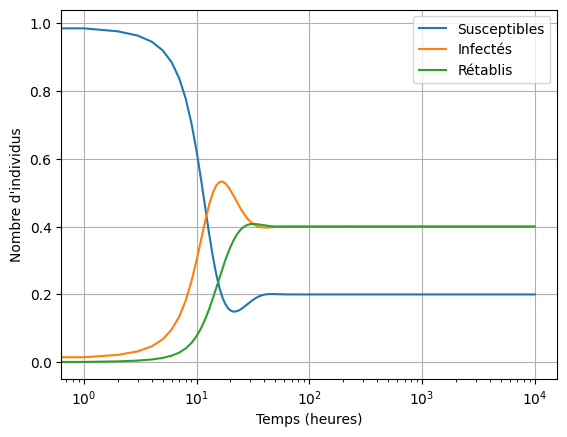

In [13]:
# propagation via RK4
for i in range(N_temps):
    t[i+1], zombies[:, i+1] = rk4(derivee_SIRS, t[i], zombies[:, i], h, beta, gamma, mu, nu)
# Représentation de la solution
plt.semilogx(t, zombies[0,:], label="Susceptibles")
plt.semilogx(t, zombies[1,:], label="Infectés")
plt.semilogx(t, zombies[2,:], label="Rétablis")
plt.xlabel('Temps (heures)')
plt.ylabel("Nombre d'individus")
plt.legend()
plt.grid()
plt.show()

## Points d'équilibre
Les points d'équilibre sont obtenus en posant les dérivées à zéro :
$$0 = -\beta S i/N + \mu R$$
$$0 = \beta S i/N - \gamma i$$
$$0 = \gamma i - \mu R$$

Résolvons ces équations pour trouver les points d'équilibre.
1. De la deuxième équation, on a $i(\beta S/N - \gamma) = 0$. Donc soit $i=0$ soit $S = \gamma N / \beta$.
2. Si $i=0$, alors de la première équation, $0 = \mu R$, donc $R=0$. Le point d'équilibre est alors $(S, i, R) = (N, 0, 0)$. Ce point correspond à l'absence d'infection.
3. Si $S = \gamma N / \beta$, alors de la troisième équation, $R = \gamma i / \mu$. En substituant dans la première équation, on obtient $0 = -\beta (\gamma N / \beta) i/N + \mu (\gamma i / \mu)$, ce qui est vérifié pour tout $i$. Ainsi, il existe une famille de points d'équilibre de la forme $(\gamma N / \beta, i, \gamma i / \mu)$ pour tout $i \geq 0$.
ATTENTION APPLIQUER LA CONTRAINT $S + I + R = N$ POUR TROUVER LE POINT D'ÉQUILIBRE NON TRIVIAL.

## Paramètre $\mathcal{R}_0$ dans le modèle SIRS
Dans le modèle SIRS, le paramètre $\mathcal{R}_0$ est défini de la même manière que dans le modèle SIR, c'est-à-dire $\mathcal{R}_0 = \frac{\beta S_0}{\gamma}$. Cependant, en raison de la perte d'immunité, le comportement de l'épidémie peut être différent. En particulier, même si $\mathcal{R}_0 > 1$, l'épidémie peut ne pas se propager de manière exponentielle, car les individus rétablis peuvent redevenir susceptibles.

# Modèle SIRSD
Le modèle SIRSD est une extension du modèle SIR qui prend en compte la possibilité que les individus infectés puissent mourir de la maladie. Les équations du modèle SIRSD sont les suivantes :
$$\frac{dS}{dt} = -\beta S I + \mu R$$
$$\frac{dI}{dt} = \beta S I - \gamma I - \nu I$$
$$\frac{dR}{dt} = \gamma I - \mu R$$
$$\frac{dM}{dt} = \nu I$$
où $S$ est le nombre de susceptibles, $I$ est le nombre d'infectés, $R$ est le nombre de rétablis et $M$ est le nombre de morts. Le paramètre $\nu$ représente le taux de mortalité, c'est-à-dire la vitesse à laquelle les individus infectés meurent de la maladie.       

In [26]:
def rk4(f, t0, y0, h, beta, gamma, mu, nu):
    '''
    Méthode Runge-Kutta d'ordre 4
    '''
    k0 = f(y0[:], beta, gamma, mu, nu, t0)
    k1 = f(y0[:] + h/2 * k0, beta, gamma, mu, nu, t0 + h/2)
    k2 = f(y0[:] + h/2 * k1, beta, gamma, mu, nu, t0 + h/2)
    k3 = f(y0[:] + h * k2, beta, gamma, mu, nu, t0 + h)

    k = 1/6 * (k0 + 2*k1 + 2*k2 + k3)
    return t0 + h, y0 + h * k

In [27]:
# Valeurs initiales
N_temps = 10000 #Nombre de 30s dans 100h
h = 1
I0 = 10
S0 = 990
R0 = 0
M0 = 0

# Normalisation de la population (stabilité du RK4)
Norme_pop = I0 + S0 + R0 + M0
i0 = I0 / Norme_pop
s0 = S0 / Norme_pop
r0 = R0 / Norme_pop
m0 = M0 / Norme_pop

# Définition des tableaux
t = np.zeros(N_temps+1)
zombies = np.empty((4, N_temps+1))

# Conditions initiales
zombies_ini = np.array([s0, i0, r0, m0])
t0 = 0

# Application des conditions initiales
zombies[:,0] = zombies_ini
t[0] = t0

beta = 0.5 #Taux d'infection
gamma = 0.1 #Taux de récupération
mu = 0.1 #Taux de resusceptibilité
nu = 0.05 #Taux de mortalité

In [28]:
def derivee(zombies, beta, gamma, mu, nu, t):
    '''
        Soit zombies = (S, I, R, M)
        Loi 1 : d[zombies[0]]/dt = -beta * zombies[0] * zombies[1] + mu * zombies[2]
        Loi 2 : d[zombies[1]]/dt = beta * zombies[0] * zombies[1] - gamma * zombies[1] - nu * zombies[1]
        Loi 3 : d[zombies[2]]/dt = gamma * zombies[1] - mu * zombies[2]
        Loi 4 : d[zombies[3]]/dt = nu * zombies[1]
    '''
    # Initialisation de la dérivée
    dzombies = np.empty(zombies.shape)
    
    # Dérivée
    dzombies[0] = -beta * zombies[0] * zombies[1] + mu * zombies[2]
    dzombies[1] = beta * zombies[0] * zombies[1] - gamma * zombies[1] - nu * zombies[1]
    dzombies[2] = gamma * zombies[1] - mu * zombies[2]
    dzombies[3] = nu * zombies[1]

    return dzombies

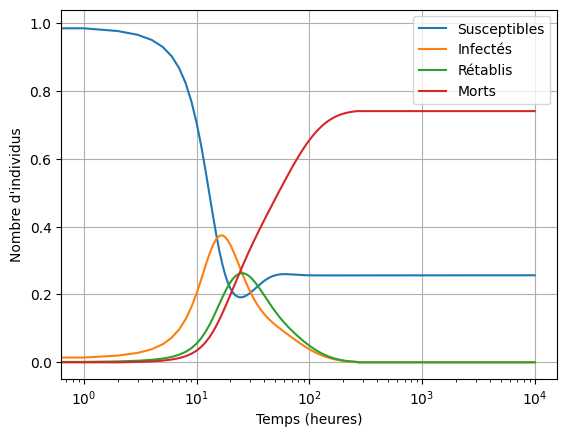

[[0.99       0.98416425 0.97611676 ... 0.25646513 0.25646513 0.25646513]
 [0.01       0.0141     0.01981273 ... 0.         0.         0.        ]
 [0.         0.00113901 0.00263382 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.74016552 0.74016552 0.74016552]]


In [29]:
# Fonction propagation via RK4
def propagation(N_temps, zombies, t, Norme_pop):
    nombre_variables, _ = zombies.shape
    for i in range(N_temps):
        # Approximation des très petites valeurs à 0
        for j in range(nombre_variables):
            if zombies[j, i] * Norme_pop < 1:
                zombies[j,i] = 0
    
        t[i+1], zombies[:, i+1] = rk4(derivee, t[i], zombies[:, i], h, beta, gamma, mu, nu)
    return(t, zombies)

# Propagation sur le temps et les individus
t, zombies = propagation(N_temps, zombies, t, Norme_pop)
# Représentation de la solution

plt.semilogx(t, zombies[0,:], label="Susceptibles")
plt.semilogx(t, zombies[1,:], label="Infectés")
plt.semilogx(t, zombies[2,:], label="Rétablis")
plt.semilogx(t, zombies[3,:], label="Morts")
plt.xlabel('Temps (heures)')
plt.ylabel("Nombre d'individus")
plt.legend()
plt.grid()
plt.show()

print(zombies)

## Paramètre $\mathcal{R}_0$ dans le modèle SIRSD
Dans le modèle SIRSD, $\frac{dI}{dt} = \beta S I - \gamma I - \nu I = I(\beta S - \gamma - \nu)$. Pour que l'infection se propage, il faut que $\beta S - \gamma - \nu > 0$, ce qui équivaut à $\frac{\beta S}{\gamma + \nu} > 1$. Ainsi, le paramètre $\mathcal{R}_0$ dans le modèle SIRSD est défini comme :
$$\boxed{\mathcal{R}_0 = \frac{\beta S_0}{\gamma + \nu}}$$

## Paramètre $M_{\infty}$
Le paramètre $M_{\infty}$ représente le nombre de morts à la fin de l'épidémie. En utilisant la quatrième équation du modèle SIRSD, on a :
$$\frac{dM}{dt} = \nu I$$
En intégrant cette équation de $t=0$ à $t=t_{end}$, on obtient :
$$M_{\infty} = \nu \int_{0}^{t_{end}} I dt$$

On peut vérifier si la somme $S + I + R + M$ est constante au cours du temps et vaut 1. I_max...

## Modèle stochastique SIR

Rappelons que $$\begin{cases}
\frac{dS}{dt} = -\beta S I \\
\frac{dI}{dt} = \beta S I - \gamma I \\
\frac{dR}{dt} = \gamma I
\end{cases}$$
La cinétique chimique modélise des concentrations continues via des ODE, ce qui implique une évolution déterministe et continue. Cependant, dans la réalité, la matière est constituée de molécules discrètes, et les événements de réaction sont aléatoires. De même, dans le contexte de la propagation d'une maladie, les interactions entre individus sont également aléatoires pour des systèmes de plus petite taille.
Le modèle stochastique SIR est une version du modèle SIR qui prend en compte la nature aléatoire de la transmission de la maladie. 
Pour cela, on peut utiliser la méthode de Gillespie, qui est une technique de simulation stochastique pour modéliser les systèmes chimiques (et par extension, les épidémies).

Nous devons tout d'abord introduire ce qu'est une chaîne de Markov. Une chaîne de Markov est un processus stochastique qui évolue dans le temps et dont l'état futur dépend uniquement de l'état actuel, et non des états passés. Dans le contexte du modèle SIR, les états possibles sont les différentes configurations de la population en termes de susceptibles, infectés et rétablis.
Par définition, l'état d'un système à l'instant $t$ , noté $X(t)$, suit une propriété de Markov, c'est-à-dire que la probabilité de transition vers un état futur ne dépend que de l'état actuel et pas des états passés. Mathématiquement, cela s'exprime par l'équation suivante :
 $$P(X(t+\Delta t) = x | X(t) = x, \text{passé}) = P(X(t+\Delta t) = x | X(t) = x)$$

 Dans SIR, on pose $X(t) = (S(t), I(t), R(t))$, où $S(t)$, $I(t)$ et $R(t)$ représentent respectivement le nombre de susceptibles, d'infectés et de rétablis à l'instant $t$. Les transitions possibles sont :
1. Infection : $S \to S-1$, $I \to I+1$ avec un taux de transition de $\beta S I / N$.
2. Rétablissement : $I \to I-1$, $R \to R+1$ avec un taux de transition de $\gamma I$.

Dans une grille, l'état devient un vecteur $X(t) = {S_{k}(t), I_{k}(t), R_{k}(t)}_{k=1,\ldots, K}$ où $k$ représente la position dans la grille. 




Voici l'algorithme de Gillespie pour simuler le modèle stochastique SIR :
1. Initialiser les populations $S(0)$, $I(0)$ et $R(0)$.
2. Calculer les taux de transition pour les événements d'infection et de rétablissement :
   - Taux d'infection : $a_1 = \beta S I / N$
   - Taux de rétablissement : $a_2 = \gamma I$
3. Calculer le taux total de transition : $a_0 = a_1 + a_2$.
4. Générer un nombre aléatoire $r_1$ uniformément distribué dans l'intervalle (0, 1) et calculer le temps jusqu'au prochain événement : $\tau = \frac{1}{a_0} \ln\left(\frac{1}{r_1}\right)$
5. Générer un deuxième nombre aléatoire $r_2$ uniformément distribué dans l'intervalle (0, 1) pour déterminer quel événement se produit :
   - Si $r_2 < \frac{a_1}{a_0}$, alors une infection se produit : $S \to S-1$, $I \to I+1$. Cela correspond à une "roulette" pondérée où ici $p(\text{infection}) = \frac{a_1}{a_0}$ et $p(\text{rétablissement}) = \frac{a_2}{a_0}$.
   - Sinon, un rétablissement se produit : $I \to I-1$, $R \to R+1$.
6. Mettre à jour le temps actuel : $t = t + \tau$
7. Répéter les étapes 2 à 6 jusqu'à ce que le nombre d'infectés soit nul ou que le temps dépasse une certaine limite.

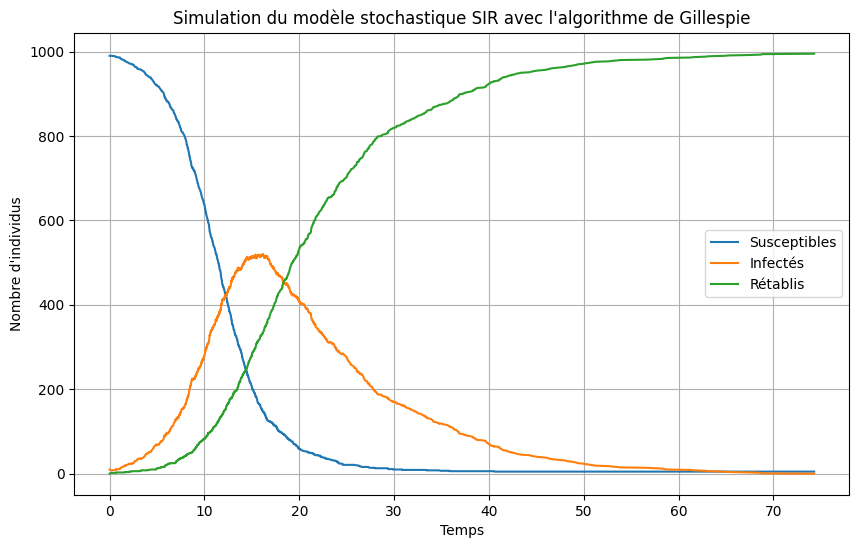

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def gillespie_sir(S0, I0, R0, beta, gamma, max_time):
    S = [S0]
    I = [I0]
    R = [R0]
    t = [0]

    while I[-1] > 0 and t[-1] < max_time:
        # Calcul des taux de transition
        a1 = beta * S[-1] * I[-1] / (S[-1] + I[-1] + R[-1])  # Taux d'infection
        a2 = gamma * I[-1]  # Taux de rétablissement
        a0 = a1 + a2  # Taux total

        if a0 == 0:
            break

        # Génération du temps jusqu'au prochain événement
        r1 = np.random.rand()
        tau = (1 / a0) * np.log(1 / r1)

        # Génération du type d'événement
        r2 = np.random.rand()
        if r2 < a1 / a0:
            # Infection
            S.append(S[-1] - 1)
            I.append(I[-1] + 1)
            R.append(R[-1])
        else:
            # Rétablissement
            S.append(S[-1])
            I.append(I[-1] - 1)
            R.append(R[-1] + 1)

        t.append(t[-1] + tau)

    return t, S, I, R

S0 = 990 
I0 = 10   
R0 = 0    
beta = 0.5  
gamma = 0.1  
max_time = 160  


# Simulation
t, S, I, R = gillespie_sir(S0, I0, R0, beta, gamma, max_time)
# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptibles')
plt.plot(t, I, label='Infectés')
plt.plot(t, R, label='Rétablis')
plt.xlabel('Temps')
plt.ylabel('Nombre d\'individus')
plt.title('Simulation du modèle stochastique SIR avec l\'algorithme de Gillespie')
plt.legend()
plt.grid()
plt.show()